In [1]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

### Reading the dataset in Python 

In [2]:
#reading the dataset
try:
    df = pd.read_csv('diabetes.csv')
except Exception as e:
    e
    

### Display the Columns in dataset

In [4]:
#get column names
columns = df.columns
#display it
columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Calculate the mean of each column of the dataset

In [5]:
# Calculates and returns the mean of each column in the DataFrame 'df'.
df.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

### Check for the null values present in the dataset. 

In [4]:
#there are couple of ways to check for null values in data
df.isnull() # Returns a DataFrame of booleans indicating missing values.
df.isnull().any()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Visualizations of the dataset

# Analyzing Glucose and Insulin Levels in Diabetes Prediction

### Data: 
* Glucose and insulin levels
* diabetes outcome (yes/no).

### Methodology

1. **Data Cleaning:**
Removed rows where Glucose = 0 or Insulin = 0 to ensure accurate analysis. Zero values are biologically improbable and likely represent missing or erroneous data.
2. **Analysis:**
Used a scatter plot to visualize the relationship between Glucose and Insulin levels, color-coded by diabetes outcome (Yes/No).

### Analysis: 
Scatter plot shows:

* Higher glucose generally correlates with diabetes (Outcome=1).
* Diabetic individuals exhibit varied insulin responses:
    * Some show low insulin at high glucose (potential insufficiency).
    * Others show high insulin with high glucose (potential resistance).
* Overlap exists between diabetic and non-diabetic groups, meaning glucose/insulin alone aren't perfect predictors, suggesting other factors influence diabetes risk.

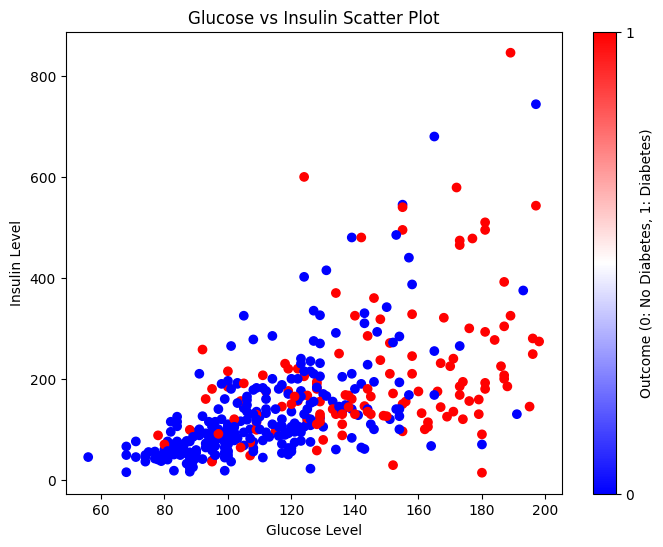

In [23]:
# Set figure size
plt.figure(figsize=(8, 6))

# Filter the DataFrame:
# - Remove rows where Glucose = 0 and insulin = 0
df_cleaned = df[(df["Glucose"] > 0) & (df["Insulin"] > 0)]

# Create a scatter plot
scatter = plt.scatter(df_cleaned["Glucose"], df_cleaned["Insulin"], c=df_cleaned["Outcome"], cmap="bwr")

# Add color legend
cba = plt.colorbar(label="Outcome (0: No Diabetes, 1: Diabetes)")
cba.set_ticks([0, 1])

# Labels and title
plt.xlabel("Glucose Level")
plt.ylabel("Insulin Level")
plt.title("Glucose vs Insulin Scatter Plot")

# Show plot
plt.show()

# Analyzing Skin Thickness in Diabetes Prediction

**Data:**

* Skin Thickness measurements.
* Diabetes outcome (Yes/No).

**Methodology:**

1.  **Data Cleaning:**
    * Removed rows where Skin Thickness = 0 to ensure accurate analysis. This is because a skin thickness of zero is biologically improbable and likely represents missing or erroneous data.
2.  **Analysis:**
    * Used a bar chart to compare the average Skin Thickness between diabetic and non-diabetic groups.

**Analysis**

* Diabetic individuals exhibit a higher average Skin Thickness compared to non-diabetic individuals.
* This observation suggests a potential link between skinfold thickness and diabetes risk.
* Since Skin Thickness is related to body fat, it may correlate with Body Mass Index (BMI) and insulin resistance, both of which are known risk factors for diabetes.


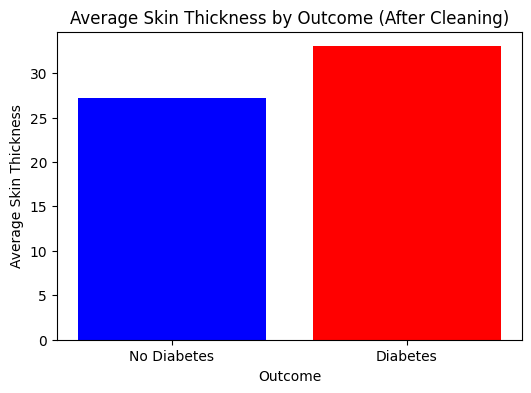

In [11]:
#set the size
plt.figure(figsize=(6, 4))

# Remove rows where SkinThickness is 0
df_cleaned = df[df["SkinThickness"] > 0]

# Calculate average skin thickness for each outcome group
avg_skinthickness = df_cleaned.groupby("Outcome")["SkinThickness"].mean()

# Create a bar chart
plt.bar(avg_skinthickness.index, avg_skinthickness.values, color=["blue", "red"])

# Labels and title
plt.xticks([0, 1], ["No Diabetes", "Diabetes"])  # Set custom labels
plt.xlabel("Outcome")
plt.ylabel("Average Skin Thickness")
plt.title("Average Skin Thickness by Outcome (After Cleaning)")

plt.show()

# Analyzing Age Distribution in Diabetes Diagnosis  

### Data:  
* Age of individuals  
* Diabetes outcome (Yes/No)  

### Methodology  

1. **Data Preparation:**  
   - Included all age values (no biologically improbable zeros, unlike glucose/insulin).  
   - Grouped data by diabetes outcome for comparison.  

2. **Analysis:**  
   - Created overlapping histograms to compare age distributions for diabetic (Outcome=1) and non-diabetic (Outcome=0) groups.  
   - Used transparency (`alpha=0.5`) to visualize overlapping ranges.  

### Analysis:  
Histogram reveals:  

* **Non-diabetic group (Blue):**  
  - Dominates younger ages (20 – 40), suggesting lower diabetes prevalence in youth.  
  - Declines steadily after age 40.  

* **Diabetic group (Red):**  
  - Rare in ages 20–30 but rises sharply from age 40, peaking at 50–60.  
  - Overlaps with non-diabetic group in middle age (40–60), indicating age is a *contributing but not sole* factor.  
 

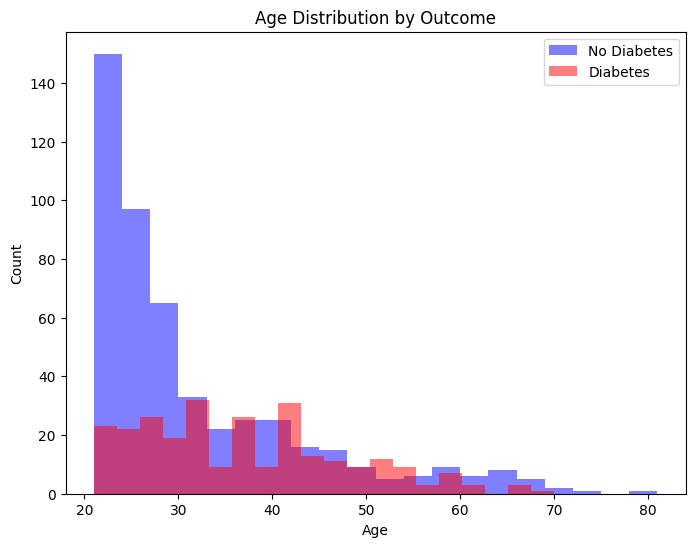

In [4]:
plt.figure(figsize=(8, 6))

# Plot histograms for both groups (diabetic and non-diabetic)
plt.hist(df[df["Outcome"] == 0]["Age"], bins=20, alpha=0.5, label="No Diabetes", color="blue")
plt.hist(df[df["Outcome"] == 1]["Age"], bins=20, alpha=0.5, label="Diabetes", color="red")

# Labels and title
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution by Outcome")
plt.legend()
plt.show()
